In [1]:
import zipfile

zip_path = "/content/archive (11).zip"

extract_to = "/content/your_extracted_folder/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

import os
os.listdir(extract_to)


['sample_submission.csv', 'test.csv', 'train.csv']

In [2]:
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
# TensorFlow for deep neural neteworks
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# For Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.. Just wait a few moments...")
else:
    print("CUDA not Available.. May the force be with you.")

CUDA Available.. Just wait a few moments...


In [4]:
train = pd.read_csv("/content/your_extracted_folder/train.csv")

In [5]:
X = train.drop(columns=['label'])
y = train['label']

In [6]:
X = X/255

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [9]:
X = X.values.reshape(-1,28,28,1)


In [10]:
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [11]:
y = to_categorical(y, num_classes=10) #, num_classes=10

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1))) #output (w-f+2p)/s+1  ,padding='valid'
# model.add(AveragePooling2D((2,2)))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D((2,2)))
# model.add(layers.Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(Dense(10, activation="softmax"))
# model.summary()

In [14]:
# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])  #Adam

In [15]:
# epochs = 20  #15
# batch_size = 120 #100

In [16]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])


In [17]:


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897,290 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 384 (1.50 KB)

In [18]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [20]:
history = model.fit(X_train, y_train, epochs=30, batch_size=180, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.8528 - loss: 0.4846 - val_accuracy: 0.6813 - val_loss: 1.6037
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9746 - loss: 0.0826 - val_accuracy: 0.7015 - val_loss: 0.9144
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9789 - loss: 0.0675 - val_accuracy: 0.9774 - val_loss: 0.0998
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9817 - loss: 0.0606 - val_accuracy: 0.9875 - val_loss: 0.0404
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.9874 - val_loss: 0.0432
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9863 - loss: 0.0441 - val_accuracy: 0.9904 - val_loss: 0.0287
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9894 - val_loss: 0.0362
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9904 - loss: 0.0279 - val_accuracy:

In [21]:
_, acc = model.evaluate(X_val, y_val, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.179


In [22]:
Y_pred = model.predict(X_val)
#print(y_val)
#accuracy = accuracy_score(y_val, y_pred)
#print(f'Accuracy: {accuracy}')
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print('confusion_mtx ',confusion_mtx)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
confusion_mtx  [[811   0   0   0   0   0   3   0   1   1]
 [  0 903   2   0   0   0   0   4   0   0]
 [  0   0 841   1   2   0   0   1   1   0]
 [  0   0   1 932   0   2   0   1   1   0]
 [  1   0   0   0 826   0   3   0   2   7]
 [  0   0   0   9   0 690   0   0   3   0]
 [  1   1   0   0   0   1 780   0   2   0]
 [  0   1   3   0   0   0   0 885   1   3]
 [  0   1   0   0   1   0   0   1 832   0]
 [  1   0   0   0   1   0   0   2   3 831]]


In [23]:
X_test = pd.read_csv("/content/your_extracted_folder/test.csv")
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_test = X_test/255
X_test = X_test.values.reshape(-1,28,28,1)


In [25]:
print(len(X_test))

28000


In [26]:



# predict results
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
print(results[0:5])

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64


In [27]:

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("sample_submission.csv",index=False)

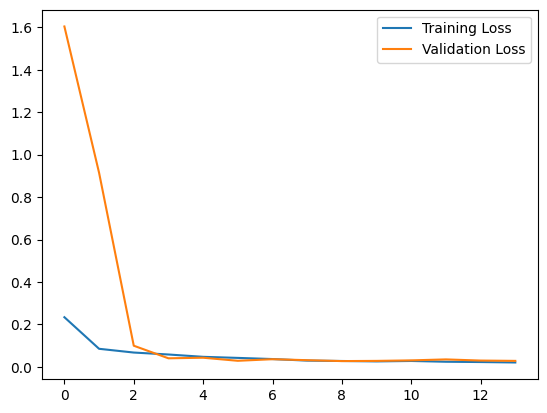

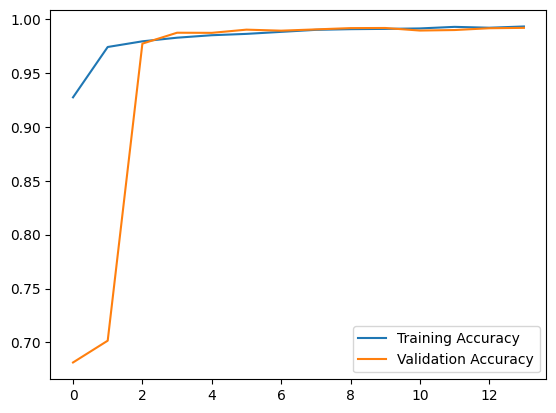

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [29]:

results = model.predict(X_test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

submission = pd.concat([pd.Series(range(1, len(results) + 1), name="ImageId"), results], axis=1)
submission.to_csv("sample_submission_mohamed_hosam.csv", index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [30]:
model.save('model.keras')